## Vehicle Type Classification Project

In this notebook I will present how to perform classification of car brands.  I will be using different pre-trainied classifiers in Tensorflow 2.0 and Keras

# Summary

- **Name:** F Ssemwanga
- **Date:** June 2023
- **Use Case:** Vehicle Type
- **Algorithm:** MobileNetV2
- **Number of training images:** 603
- **Number of classes:** 7
- **Batch Size:** 64
- **Optimizer:** Adam 
- **Learning Rate:** 0.0001
- **Loss Type:**CategoricalCrossentropy
- **Transfer Learning:** Yes | Imagenet

**Comments:** I obtained 100% on the validation accuracy on vehicle types, on validation dataset.
* [Tensor Flow Docs](https://www.tensorflow.org/api_docs/python/tf/keras/application)

In [1]:
# Importing the required Libraries
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (
    AveragePooling2D,
    GlobalAveragePooling2D,
    BatchNormalization,
)

# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import sys
import tensorflow as tf
import h5py
import numpy as np
import sys

In [2]:
print(tf.__version__)

2.16.1


#### Setting the project paths

In [3]:
def create_required_folders(project_path, model_type, folders):
    try:
        for folder in folders:
            full_path = os.path.join(project_path, folder, model_type)
            # Convert backslashes to forward slashes
            full_path = full_path.replace("\\", "/")
            if not os.path.exists(full_path):
                os.makedirs(full_path)
                print(f"Created folder: {full_path}")
            else:
                print(f"Folder already exists: {full_path}")
    except OSError as e:
        print(f"Error creating folder {full_path}: {e}")

In [6]:
# Define variables
TYPE = "type"
model_type = "mobilenetv2"
user = "fs"
iteration = "1-2"
TRAINED_MODELS_PATH = "trained-models"
CHECK_POINTS_PATH = "checkpoints"
first_time_training = True

# Define the project path
PROJECT_PATH = "./"
print(f"PROJECT_PATH: {PROJECT_PATH}")

# Construct paths using the project path and other variables
HDF5_DATASET_PATH = (
    f"{PROJECT_PATH}datasets/vehicle-type-dataset-SIZE224-train-dev-test-v2.hdf5"
)
print(f"HDF5_DATASET_PATH: {HDF5_DATASET_PATH}")

ACCURACY_LOSS_OUTPUT_FILE = f"{PROJECT_PATH}log/{model_type}/{model_type}-by-{TYPE}-accuracy-loss-{user}-{iteration}.jpg"
print(f"ACCURACY_LOSS_OUTPUT_FILE: {ACCURACY_LOSS_OUTPUT_FILE}")

TARGET_CLASSIFICATION_MODEL = f"{PROJECT_PATH}{TRAINED_MODELS_PATH}/{model_type}/vehicle-classification-by-{TYPE}-{model_type}-{user}-{iteration}.h5"
print(f"TARGET_CLASSIFICATION_MODEL: {TARGET_CLASSIFICATION_MODEL}")

CHECKPOINT_PATH = f"{PROJECT_PATH}{CHECK_POINTS_PATH}/{model_type}/by-{TYPE}-{model_type}-{user}-{iteration}.h5"
print(f"CHECKPOINT_PATH: {CHECKPOINT_PATH}")

LOGFILE_PATH = f"{PROJECT_PATH}log/{model_type}/{model_type}-by-{TYPE}-training-log-{user}-{iteration}.csv"
print(f"LOGFILE_PATH: {LOGFILE_PATH}")

# Create required folders
folders = [TRAINED_MODELS_PATH, CHECK_POINTS_PATH, "log"]
create_required_folders(PROJECT_PATH, model_type, folders)

PROJECT_PATH: ./
HDF5_DATASET_PATH: ./datasets/vehicle-type-dataset-SIZE224-train-dev-test-v2.hdf5
ACCURACY_LOSS_OUTPUT_FILE: ./log/mobilenetv2/mobilenetv2-by-type-accuracy-loss-fs-1-2.jpg
TARGET_CLASSIFICATION_MODEL: ./trained-models/mobilenetv2/vehicle-classification-by-type-mobilenetv2-fs-1-2.h5
CHECKPOINT_PATH: ./checkpoints/mobilenetv2/by-type-mobilenetv2-fs-1-2.h5
LOGFILE_PATH: ./log/mobilenetv2/mobilenetv2-by-type-training-log-fs-1-2.csv
Folder already exists: ./trained-models/mobilenetv2
Folder already exists: ./checkpoints/mobilenetv2
Folder already exists: ./log/mobilenetv2


#### Import the required utils module

* Update this path if using Google Colab

In [7]:
sys.path.append(PROJECT_PATH)
from utils_lib  import *

#### Loading the dataset and visualising it

##### 1. Load HDF5 File 

* Use the load_dataset_from_hdf5_file() method in the utils-lib module

In [10]:
trainX, trainY, trainLabels, devX, devY, devLabels, testX, testY, testLabels = (
    load_dataset_from_hdf5_file(HDF5_DATASET_PATH)
)

trainX.shape: (603, 224, 224, 3)
trainY.shape: (603, 7)
trainLabels.shape: (603,)
devX.shape: (75, 224, 224, 3)
devY.shape: (75, 7)
devLabels.shape: (75,)
testX.shape: (76, 224, 224, 3)
testY.shape: (76, 7)
testLabels.shape: (76,)


In [11]:
IMAGE_SIZE = trainX.shape[1]
print(IMAGE_SIZE)

224


In [13]:
number_of_classes = np.unique(trainLabels).size
print(number_of_classes)

7


#### Visualise data from the train dataset

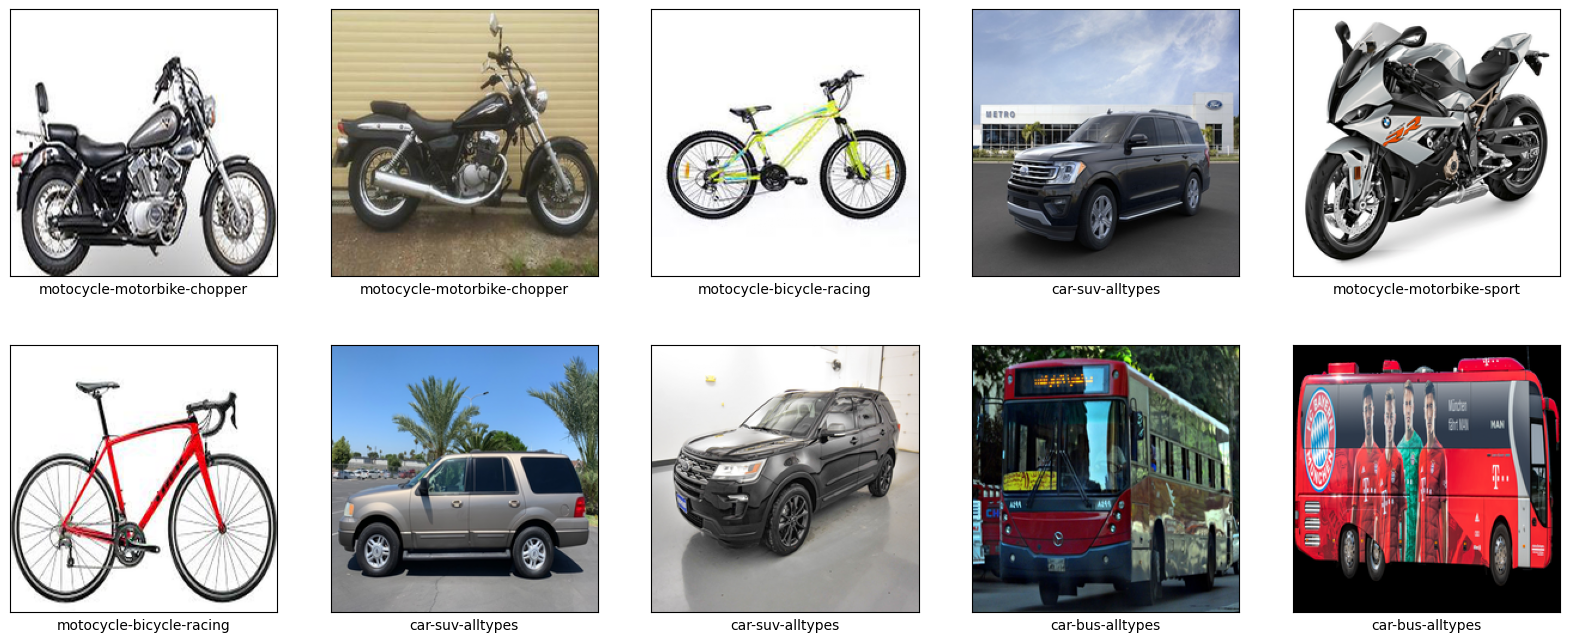

In [15]:
plot_sample_from_dataset(trainX, trainLabels, rows=2, columns=5, width=20, height=8)

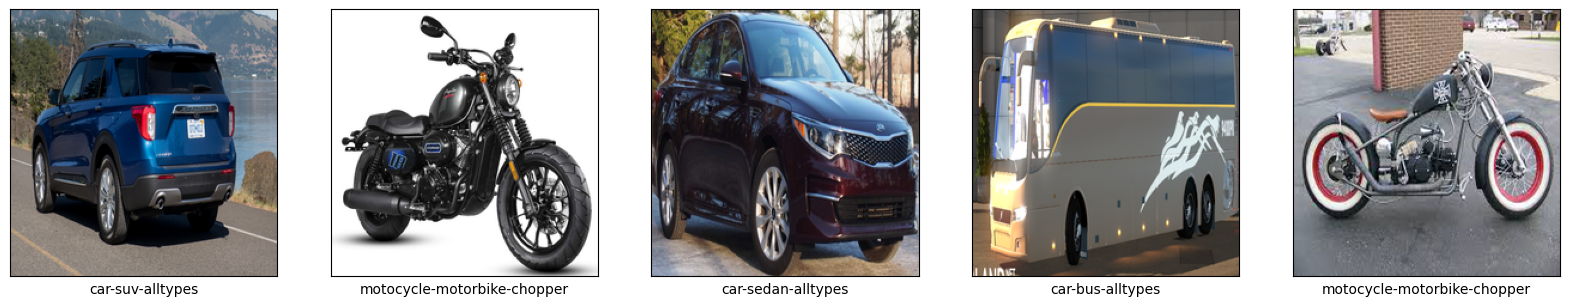

In [16]:
plot_sample_from_dataset(devX, devLabels, rows=1, columns=5, width=20, height=8)

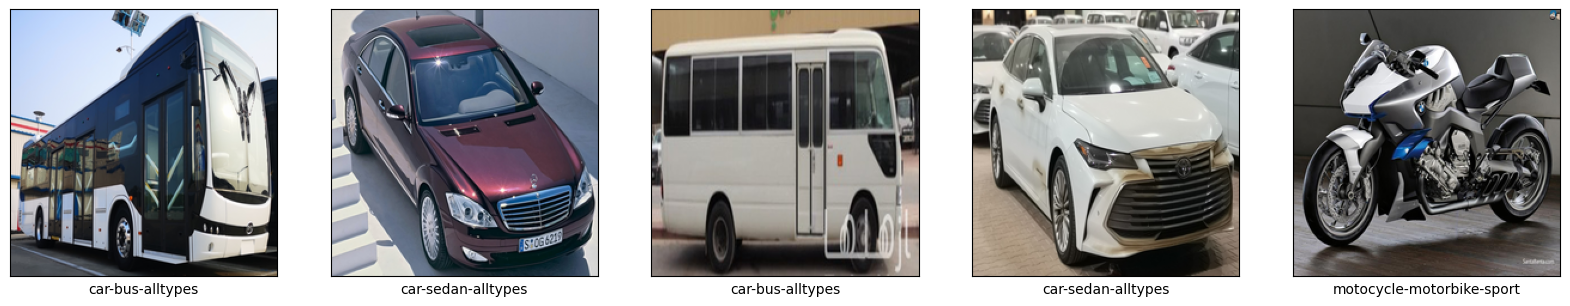

In [17]:
plot_sample_from_dataset(testX, testLabels, rows=1, columns=5, width=20, height=8)